# Cleaning and transforming data

Files needed = ('atussum_2017.dat', movie lens small data set)

We now know how to create some complicated datasets. In this notebook we will continue practicing techniques for manipulating data into forms that are amenable to analysis.  

We will also learn about the American Time Use Survey. 

In [24]:
import pandas as pd                 # pandas for data handling
import matplotlib.pyplot as plt     # matplotlib for plots
import numpy as np                  # numpy for numerical methods 

## American Time Use Survey (ATUS)
The Bureau of Labor Statistics oversees the [American Time Use Survey](https://www.bls.gov/tus/), which asks a sample of Americans to complete detailed diaries keeping track of each minute of their day. 

Follow this link [https://www.bls.gov/tus/datafiles_2017.htm](https://www.bls.gov/tus/datafiles_2017.htm) to the page for the 2017 survey. Download the **ATUS 2017 Activity summary file (zip)** file located in the **2017 Basic ATUS Data Files** section of the page. Alternatively, download it directly [https://www.bls.gov/tus/special.requests/atussum_2017.zip](https://www.bls.gov/tus/special.requests/atussum_2017.zip). 

Unzip the file. We are looking for `atussum_2017.dat`. It is a coma separated file. Let's get it loaded.

In [25]:
atus = pd.read_csv('atussum_2017/atussum_2017.dat')

In [26]:
atus.head()

,TUCASEID,TUFINLWGT,TRYHHCHILD,TEAGE,TESEX,PEEDUCA,PTDTRACE,PEHSPNON,GTMETSTA,TELFS,...,t181601,t181699,t181801,t181899,t189999,t500101,t500103,t500105,t500106,t500107
0,20170101170002,5.217551e+06,15,34,2,39,2,2,1,1,...,0,0,0,0,0,0,0,0,0,0
1,20170101170012,3.106847e+06,7,28,2,40,1,2,1,5,...,0,0,0,0,0,0,0,0,0,0
2,20170101170027,1.653409e+07,15,15,1,35,3,2,1,5,...,0,0,0,0,0,0,0,0,0,0
3,20170101170030,1.757071e+07,-1,46,1,39,1,2,1,1,...,0,0,0,0,0,0,0,0,0,0
4,20170101170033,1.022275e+06,-1,85,1,44,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


421 variables! That's too many for us today. Let's just keep a few. 

In [27]:
col_list=atus.columns.tolist()   # columns returns a list object. Turn it into a list for easier printing.

# Print the first and last 20 variables. 
print(col_list[0:20],'\n')
print(col_list[-20:])

['TUCASEID', 'TUFINLWGT', 'TRYHHCHILD', 'TEAGE', 'TESEX', 'PEEDUCA', 'PTDTRACE', 'PEHSPNON', 'GTMETSTA', 'TELFS', 'TEMJOT', 'TRDPFTPT', 'TESCHENR', 'TESCHLVL', 'TRSPPRES', 'TESPEMPNOT', 'TRERNWA', 'TRCHILDNUM', 'TRSPFTPT', 'TEHRUSLT'] 

['t181204', 't181205', 't181299', 't181301', 't181302', 't181399', 't181401', 't181499', 't181501', 't181599', 't181601', 't181699', 't181801', 't181899', 't189999', 't500101', 't500103', 't500105', 't500106', 't500107']


The demographic variables are all uppercase letters. The time variables are of the form 'txxyyzz' where xx is the major category code, yy is the second-tier code, and zz is the third-tier code. ([docs](https://www.bls.gov/tus/lexiconnoex2017.pdf))

Let's keep some demographic data and some data about working and sleeping. 

In [28]:
vars_to_keep = ['TEAGE', 'TESEX', 'PTDTRACE', 'PEEDUCA', 'GTMETSTA', 'TELFS', 
                'TUDIARYDAY', 't050101', 't050102', 't050201', 't010101', 't010102']

atus_small = atus[vars_to_keep]

In [29]:
atus_small.head()

,TEAGE,TESEX,PTDTRACE,PEEDUCA,GTMETSTA,TELFS,TUDIARYDAY,t050101,t050102,t050201,t010101,t010102
0,34,2,2,39,1,1,1,450,0,0,728,0
1,28,2,1,40,1,5,7,0,0,0,385,0
2,15,1,3,35,1,5,4,0,0,0,570,0
3,46,1,1,39,1,1,2,480,0,0,525,0
4,85,1,1,44,1,1,7,0,0,0,756,0


Let's give the columns some more reasonable names. 

In [30]:
# See https://www.bls.gov/tus/freqvariables.pdf for frequently used variables
atus_small = atus_small.rename(columns={'TEAGE':'age', 'TESEX':'gender', 'PTDTRACE':'race', 
                           'PEEDUCA':'edu', 'GTMETSTA':'metro', 'TELFS':'employ', 'TUDIARYDAY':'day'})
atus_small.head()

,age,gender,race,edu,metro,employ,day,t050101,t050102,t050201,t010101,t010102
0,34,2,2,39,1,1,1,450,0,0,728,0
1,28,2,1,40,1,5,7,0,0,0,385,0
2,15,1,3,35,1,5,4,0,0,0,570,0
3,46,1,1,39,1,1,2,480,0,0,525,0
4,85,1,1,44,1,1,7,0,0,0,756,0


In [31]:
# See https://www.bls.gov/tus/lexiconnoex2017.pdf for definitions
atus_small = atus_small.rename(columns={'t050101':'work_main', 't050102':'work_other', 't010101':'sleep', 
                                        't050201':'work_soc', 't010102':'no_sleep'})
atus_small.head()

,age,gender,race,edu,metro,employ,day,work_main,work_other,work_soc,sleep,no_sleep
0,34,2,2,39,1,1,1,450,0,0,728,0
1,28,2,1,40,1,5,7,0,0,0,385,0
2,15,1,3,35,1,5,4,0,0,0,570,0
3,46,1,1,39,1,1,2,480,0,0,525,0
4,85,1,1,44,1,1,7,0,0,0,756,0


Okay, we have variable names that we can live with. Let's start transforming the data to get it ready for analysis. 

### A word on loops
We have seen many places where a loop saved us time and effort. It might seem natural to use a loop to perform an operation on each element of a column or a DataFrame. 

In general, however, we want to avoid this. Instead, we have used pandas vectorized operations such as 
```python
x['new_var'] = x['var_1'] / x['var_2']
```
to perform element-wise division. Using pandas' native operations is much (much much) faster than looping over the rows of a DataFrame. A lot of optimization has been written into the native functions that is not there when we loop ourselves. 

Fortunately, pandas provides methods that let us to very complex and very general operations to a DataFrame without resorting to a loop. We consider a few of these below. 

### replace( ) 

The gender variable is coded 1 for male and 2 for female. I do not want to have to remember that!

The `replace( )` method replaces one value for another. One syntax is 
```
atus_small['gender'] = atus_small['gender'].replace(1, 'male')
```
but a more powerful one passes a dict or a list.
```
atus_small['gender'] = atus_small['gender'].replace({1:'male', 2:'female'})
```

In [32]:
gender_codes = {1:'male', 2:'female'}
atus_small['gender'] = atus_small['gender'].replace(gender_codes)
atus_small.head()

,age,gender,race,edu,metro,employ,day,work_main,work_other,work_soc,sleep,no_sleep
0,34,female,2,39,1,1,1,450,0,0,728,0
1,28,female,1,40,1,5,7,0,0,0,385,0
2,15,male,3,35,1,5,4,0,0,0,570,0
3,46,male,1,39,1,1,2,480,0,0,525,0
4,85,male,1,44,1,1,7,0,0,0,756,0


### unique( )
Let's code race, too. What codes are in our data? The method `unique( )` returns the unique values.

In [33]:
races = atus_small['race'].unique()
races.sort()
print(races)


[ 1  2  3  4  5  6  7  8  9 10 11 13 16 18]


In [34]:
# I looked up the codes in the documentation...

race_codes = {1:'white', 2:'black', 3:'native_am', 4:'asian', 5:'hawaiian', 6:'wh_bl', 
              7:'wh_na', 8:'wh_as', 9:'wh_ha', 10:'bl_na', 11:'bl_as', 13:'na_as', 16:'wh_bl_as', 18:'wh_as_ha'}

In [35]:
atus_small['race'] = atus_small['race'].replace(race_codes)

In [36]:
atus_small.head()

,age,gender,race,edu,metro,employ,day,work_main,work_other,work_soc,sleep,no_sleep
0,34,female,black,39,1,1,1,450,0,0,728,0
1,28,female,white,40,1,5,7,0,0,0,385,0
2,15,male,native_am,35,1,5,4,0,0,0,570,0
3,46,male,white,39,1,1,2,480,0,0,525,0
4,85,male,white,44,1,1,7,0,0,0,756,0


### Apply a function to a column: map( )

We can apply functions to the individual elements in a column, too. The `map()` functions handles this for us. It applies the given function to each element of the column. These can be built-in functions, or user-defined functions. This quite powerful. We can write a function that performs a complicated transformation and apply to each element of a column in one simple line.  

Let's define a function that converts minutes to hours. 

In [37]:
def minutes_to_hours(x):
    return x/60

Now apply `map( )` to the work column. 

\[This example is a bit contrived. We could have just as easily done `atus_small['work_main']/60`. But that wouldn't have given us practice with `map( )`.\] 

In [38]:
atus_small['work_main'] = atus_small['work_main'].map(minutes_to_hours)
atus_small.head()

,age,gender,race,edu,metro,employ,day,work_main,work_other,work_soc,sleep,no_sleep
0,34,female,black,39,1,1,1,7.5,0,0,728,0
1,28,female,white,40,1,5,7,0.0,0,0,385,0
2,15,male,native_am,35,1,5,4,0.0,0,0,570,0
3,46,male,white,39,1,1,2,8.0,0,0,525,0
4,85,male,white,44,1,1,7,0.0,0,0,756,0


### Apply a function to a DataFrame: applymap( )
If we want to apply the same function to each element in several columns of a DataFrame (rather than a Series) we use `applymap( )`. It works the same way, applying the function to each element. 

\[I am not sure why the developers of pandas created separate method for a Series vs a DataFrame. My best guess is that each method takes advantage of Series- or Dataframe-specific functionality for better performance.\]

In [39]:
# We can map to several columns at once.
atus_small[['work_other', 'sleep', 'no_sleep']] = atus_small[['work_other', 'sleep', 'no_sleep']].applymap(minutes_to_hours)
atus_small.head()

,age,gender,race,edu,metro,employ,day,work_main,work_other,work_soc,sleep,no_sleep
0,34,female,black,39,1,1,1,7.5,0.0,0,12.133333,0.0
1,28,female,white,40,1,5,7,0.0,0.0,0,6.416667,0.0
2,15,male,native_am,35,1,5,4,0.0,0.0,0,9.500000,0.0
3,46,male,white,39,1,1,2,8.0,0.0,0,8.750000,0.0
4,85,male,white,44,1,1,7,0.0,0.0,0,12.600000,0.0


## Practice
Take a few minutes and try the following. Feel free to chat with those around you if you get stuck. 

1. `educ` holds the highest level of education obtained. It can take values between 31 and 46. Covert the numeric values to labels. 

   * codes < 39 are 'less than high'
   * 39 = 'high school'
   * 40 = 'some college'
   * 41 & 42 are 'associate'
   * 43 = 'bachelor'
   * 44 = 'master'
   * 45 = 'prof'
   * 46 = 'phd'

In [40]:
educ_codes = {39:'high school', 40:'some college', 41:'associate', 42:'associate', 
              43: 'bachelor', 44: 'master', 45:'prof', 46:'phd'}

atus_small.loc[ atus_small['edu']<39, 'edu'] = 'less than high'
atus_small['edu'] = atus_small['edu'].replace(educ_codes)

In [41]:
# Another way to do it is to write a function like this

def recode(x):
    educ_codes = {39:'high school', 40:'some college', 41:'associate', 42:'associate', 
              43: 'bachelor', 44: 'master', 45:'prof', 46:'phd'}
    if x < 39:
        return 'less than high'
    else:
        return educ_codes[x]
    
# and use .map() on the like
# atus_small['edu'] = atus_small['edu'].map(recode)

2. Make sure you covered all your bases. Print out a list of the unique values in the column 'edu'.

In [42]:
atus_small['edu'].unique()

array(['high school', 'some college', 'less than high', 'master',
       'bachelor', 'prof', 'associate', 'phd'], dtype=object)

3. Apply the `minutes_to_hours` function to the `work_soc` variable. This variable is the time spent 'Socializing, relaxing, and leisure as part of job'. I have no idea what kind of jobs make you relax and take leisure. 

In [43]:
atus_small['work_soc'] = atus_small['work_soc'].map(minutes_to_hours)
atus_small.head()

,age,gender,race,edu,metro,employ,day,work_main,work_other,work_soc,sleep,no_sleep
0,34,female,black,high school,1,1,1,7.5,0.0,0.0,12.133333,0.0
1,28,female,white,some college,1,5,7,0.0,0.0,0.0,6.416667,0.0
2,15,male,native_am,less than high,1,5,4,0.0,0.0,0.0,9.500000,0.0
3,46,male,white,high school,1,1,2,8.0,0.0,0.0,8.750000,0.0
4,85,male,white,master,1,1,7,0.0,0.0,0.0,12.600000,0.0


4. Create a column named 'work' that is the sum of 'work_main' and 'work_other'.

In [44]:
atus_small['work'] = atus_small['work_main'] + atus_small['work_other']

5. Create a histogram of 'work' for only those observations with work>0. 

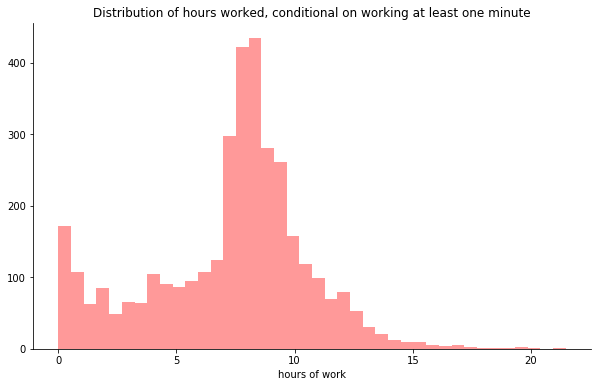

In [45]:
fig, ax = plt.subplots(figsize=(10,6))


ax.hist(atus_small.loc[ atus_small['work']>0, 'work'], bins=40, alpha = 0.4, color = 'red')

ax.set_xlabel('hours of work')
ax.set_title('Distribution of hours worked, conditional on working at least one minute')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

### Binning: cut( )

Often we would like to take a continuous variable and make it discrete. One way to do this is to place the data into 'bins' or 'buckets'. (This is implicitly being done when we create a histogram.) Pandas has a nice facility for this. 

In [46]:
# What range are the ages?
atus_small['age'].describe()

count    10223.000000
mean        49.876846
std         18.008395
min         15.000000
25%         35.000000
50%         50.000000
75%         64.000000
max         85.000000
Name: age, dtype: float64

In [47]:
# 15 to 85 years 

bins = [15, 25, 35, 45, 55, 65, 75]  # These are the endpoints for the bins

atus_small['age_bin'] = pd.cut(atus_small['age'], bins)


In [48]:
atus_small.head(10)

,age,gender,race,edu,metro,employ,day,work_main,work_other,work_soc,sleep,no_sleep,work,age_bin
0,34,female,black,high school,1,1,1,7.50,0.000000,0.0,12.133333,0.0,7.500000,"(25.0, 35.0]"
1,28,female,white,some college,1,5,7,0.00,0.000000,0.0,6.416667,0.0,0.000000,"(25.0, 35.0]"
2,15,male,native_am,less than high,1,5,4,0.00,0.000000,0.0,9.500000,0.0,0.000000,NaN
3,46,male,white,high school,1,1,2,8.00,0.000000,0.0,8.750000,0.0,8.000000,"(45.0, 55.0]"
4,85,male,white,master,1,1,7,0.00,0.000000,0.0,12.600000,0.0,0.000000,NaN
5,60,male,white,less than high,1,1,7,0.00,0.000000,0.0,9.750000,0.0,0.000000,"(55.0, 65.0]"
6,44,male,white,high school,2,1,2,8.25,0.000000,0.0,5.750000,0.0,8.250000,"(35.0, 45.0]"
7,49,female,black,bachelor,1,1,3,0.00,7.433333,0.0,6.500000,0.0,7.433333,"(45.0, 55.0]"
8,63,male,white,some college,1,1,1,1.50,0.000000,0.0,7.666667,0.0,1.500000,"(55.0, 65.0]"
9,70,female,white,master,1,5,6,0.00,0.000000,0.0,8.000000,0.0,0.000000,"(65.0, 75.0]"


I appreciate the bin notation: The open and closed ends of the interval are clearly indicated. 

Notice the NaN for observation 2. Our lowest bin starts at 15, but it is open on the left end point --- 15 is not included in the bin. We could set the bottom interval to 14 to catch this observation. We have a similar problem with observation 4.

In [49]:
bins = [14, 25, 35, 45, 55, 65, 75]  # These are the endpoints for the bins
atus_small['age_bin'] = pd.cut(atus_small['age'], bins)
atus_small.head(10)

,age,gender,race,edu,metro,employ,day,work_main,work_other,work_soc,sleep,no_sleep,work,age_bin
0,34,female,black,high school,1,1,1,7.50,0.000000,0.0,12.133333,0.0,7.500000,"(25.0, 35.0]"
1,28,female,white,some college,1,5,7,0.00,0.000000,0.0,6.416667,0.0,0.000000,"(25.0, 35.0]"
2,15,male,native_am,less than high,1,5,4,0.00,0.000000,0.0,9.500000,0.0,0.000000,"(14.0, 25.0]"
3,46,male,white,high school,1,1,2,8.00,0.000000,0.0,8.750000,0.0,8.000000,"(45.0, 55.0]"
4,85,male,white,master,1,1,7,0.00,0.000000,0.0,12.600000,0.0,0.000000,NaN
5,60,male,white,less than high,1,1,7,0.00,0.000000,0.0,9.750000,0.0,0.000000,"(55.0, 65.0]"
6,44,male,white,high school,2,1,2,8.25,0.000000,0.0,5.750000,0.0,8.250000,"(35.0, 45.0]"
7,49,female,black,bachelor,1,1,3,0.00,7.433333,0.0,6.500000,0.0,7.433333,"(45.0, 55.0]"
8,63,male,white,some college,1,1,1,1.50,0.000000,0.0,7.666667,0.0,1.500000,"(55.0, 65.0]"
9,70,female,white,master,1,5,6,0.00,0.000000,0.0,8.000000,0.0,0.000000,"(65.0, 75.0]"


We could also make the bins closed on the left and open on the right by passing `'right=False'` parameter to `cut( )`. 

In [50]:
bins = [15, 25, 35, 45, 55, 65, 75]  # These are the endpoints for the bins
atus_small['age_bin'] = pd.cut(atus_small['age'], bins, right=False)
atus_small.head(10)

,age,gender,race,edu,metro,employ,day,work_main,work_other,work_soc,sleep,no_sleep,work,age_bin
0,34,female,black,high school,1,1,1,7.50,0.000000,0.0,12.133333,0.0,7.500000,"[25.0, 35.0)"
1,28,female,white,some college,1,5,7,0.00,0.000000,0.0,6.416667,0.0,0.000000,"[25.0, 35.0)"
2,15,male,native_am,less than high,1,5,4,0.00,0.000000,0.0,9.500000,0.0,0.000000,"[15.0, 25.0)"
3,46,male,white,high school,1,1,2,8.00,0.000000,0.0,8.750000,0.0,8.000000,"[45.0, 55.0)"
4,85,male,white,master,1,1,7,0.00,0.000000,0.0,12.600000,0.0,0.000000,NaN
5,60,male,white,less than high,1,1,7,0.00,0.000000,0.0,9.750000,0.0,0.000000,"[55.0, 65.0)"
6,44,male,white,high school,2,1,2,8.25,0.000000,0.0,5.750000,0.0,8.250000,"[35.0, 45.0)"
7,49,female,black,bachelor,1,1,3,0.00,7.433333,0.0,6.500000,0.0,7.433333,"[45.0, 55.0)"
8,63,male,white,some college,1,1,1,1.50,0.000000,0.0,7.666667,0.0,1.500000,"[55.0, 65.0)"
9,70,female,white,master,1,5,6,0.00,0.000000,0.0,8.000000,0.0,0.000000,"[65.0, 75.0)"


We are still missing observation 4.

`.cut( )` can create bins for us, too. Pass cut an integer and get back that many equally-sized bins. The `precision` parameter determines how many decimal places are used in the bin edges. 

In [53]:
# Tell .cut to make three bins. It will choose the end points. 
atus_small['age_bin'] = pd.cut(atus_small['age'], bins = 3, precision = 0)
atus_small.head(10)

,age,gender,race,edu,metro,employ,day,work_main,work_other,work_soc,sleep,no_sleep,work,age_bin
0,34,female,black,high school,1,1,1,7.50,0.000000,0.0,12.133333,0.0,7.500000,"(15.0, 38.0]"
1,28,female,white,some college,1,5,7,0.00,0.000000,0.0,6.416667,0.0,0.000000,"(15.0, 38.0]"
2,15,male,native_am,less than high,1,5,4,0.00,0.000000,0.0,9.500000,0.0,0.000000,"(15.0, 38.0]"
3,46,male,white,high school,1,1,2,8.00,0.000000,0.0,8.750000,0.0,8.000000,"(38.0, 62.0]"
4,85,male,white,master,1,1,7,0.00,0.000000,0.0,12.600000,0.0,0.000000,"(62.0, 85.0]"
5,60,male,white,less than high,1,1,7,0.00,0.000000,0.0,9.750000,0.0,0.000000,"(38.0, 62.0]"
6,44,male,white,high school,2,1,2,8.25,0.000000,0.0,5.750000,0.0,8.250000,"(38.0, 62.0]"
7,49,female,black,bachelor,1,1,3,0.00,7.433333,0.0,6.500000,0.0,7.433333,"(38.0, 62.0]"
8,63,male,white,some college,1,1,1,1.50,0.000000,0.0,7.666667,0.0,1.500000,"(62.0, 85.0]"
9,70,female,white,master,1,5,6,0.00,0.000000,0.0,8.000000,0.0,0.000000,"(62.0, 85.0]"


In [54]:
pd.value_counts(atus_small['age_bin'])  # How many observations in each bin?

(38.0, 62.0]    4033
(15.0, 38.0]    3176
(62.0, 85.0]    3014
Name: age_bin, dtype: int64

### Quantiles: qcut( )
Notice that the bins are equally spaced from the smallest to the largest values of age. The number of observations in each is not equal. 

The method `.qcut( )` splits the data according to the sample quantiles. This should get you bins of approximately equal numbers of observations. 

In [57]:
# Create quartiles (4 bins) based on age
atus_small['age_bin'] = pd.qcut(atus_small['age'], q = 4)  
atus_small.head(10)

,age,gender,race,edu,metro,employ,day,work_main,work_other,work_soc,sleep,no_sleep,work,age_bin
0,34,female,black,high school,1,1,1,7.50,0.000000,0.0,12.133333,0.0,7.500000,"(14.999, 35.0]"
1,28,female,white,some college,1,5,7,0.00,0.000000,0.0,6.416667,0.0,0.000000,"(14.999, 35.0]"
2,15,male,native_am,less than high,1,5,4,0.00,0.000000,0.0,9.500000,0.0,0.000000,"(14.999, 35.0]"
3,46,male,white,high school,1,1,2,8.00,0.000000,0.0,8.750000,0.0,8.000000,"(35.0, 50.0]"
4,85,male,white,master,1,1,7,0.00,0.000000,0.0,12.600000,0.0,0.000000,"(64.0, 85.0]"
5,60,male,white,less than high,1,1,7,0.00,0.000000,0.0,9.750000,0.0,0.000000,"(50.0, 64.0]"
6,44,male,white,high school,2,1,2,8.25,0.000000,0.0,5.750000,0.0,8.250000,"(35.0, 50.0]"
7,49,female,black,bachelor,1,1,3,0.00,7.433333,0.0,6.500000,0.0,7.433333,"(35.0, 50.0]"
8,63,male,white,some college,1,1,1,1.50,0.000000,0.0,7.666667,0.0,1.500000,"(50.0, 64.0]"
9,70,female,white,master,1,5,6,0.00,0.000000,0.0,8.000000,0.0,0.000000,"(64.0, 85.0]"


In [58]:
pd.value_counts(atus_small['age_bin'])  # How many observations in each bin?

(35.0, 50.0]      2644
(14.999, 35.0]    2560
(50.0, 64.0]      2517
(64.0, 85.0]      2502
Name: age_bin, dtype: int64

### String methods
We have seen some of these before. When we learned about strings. These are analogous to the string methods in standard python, but they have been optimized for DataFrames. These *vectorized string methods*, work element-wise over an entire column. The method call looks like

```python
data['var'].str.method()
```

where `.method( )` is the method we are applying. A list of vectorized string methods is on page 218 in McKinney and in the [documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/text.html#method-summary). Below, we try a few out. 

In [59]:
movies = pd.read_csv('ml-latest-small/movies.csv')
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


### str.contains( )
The genres are mixed together. Let's get all the comedies. The `contains( )` method returns a bool Series with True for observations in which the string contains the search term.

In [64]:
movies['genres'].str.contains('Comedy')

0        True
1       False
2        True
3        True
4        True
        ...  
9737     True
9738     True
9739    False
9740    False
9741     True
Name: genres, Length: 9742, dtype: bool

In [65]:
comedies = movies[movies['genres'].str.contains('Comedy')]
comedies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
6,7,Sabrina (1995),Comedy|Romance


### str.split( )
This method splits the string up at the delimiter that is passed to split( ). It returns a list of each chunk that falls between the delimiter. 

This could be useful processing name data that come in the form: last,first or city,state. 

In [66]:
# The movie genres are separated with the '|' character. 
# Remember, DataFrames can have columns of lists...

movies['genre_split'] = movies['genres'].str.split('|')
movies.head(10)

,movieId,title,genres,genre_split
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"[Adventure, Animation, Children, Comedy, Fantasy]"
1,2,Jumanji (1995),Adventure|Children|Fantasy,"[Adventure, Children, Fantasy]"
2,3,Grumpier Old Men (1995),Comedy|Romance,"[Comedy, Romance]"
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,"[Comedy, Drama, Romance]"
4,5,Father of the Bride Part II (1995),Comedy,[Comedy]
5,6,Heat (1995),Action|Crime|Thriller,"[Action, Crime, Thriller]"
6,7,Sabrina (1995),Comedy|Romance,"[Comedy, Romance]"
7,8,Tom and Huck (1995),Adventure|Children,"[Adventure, Children]"
8,9,Sudden Death (1995),Action,[Action]
9,10,GoldenEye (1995),Action|Adventure|Thriller,"[Action, Adventure, Thriller]"


### str.join ( )
Put strings together. Separate the pieces with a delimiter of your choosing. 

In [67]:
movies['with_colons'] = movies['genre_split'].str.join('::')
movies.head()

,movieId,title,genres,genre_split,with_colons
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"[Adventure, Animation, Children, Comedy, Fantasy]",Adventure::Animation::Children::Comedy::Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy,"[Adventure, Children, Fantasy]",Adventure::Children::Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance,"[Comedy, Romance]",Comedy::Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,"[Comedy, Drama, Romance]",Comedy::Drama::Romance
4,5,Father of the Bride Part II (1995),Comedy,[Comedy],Comedy


## Practice: What era had the best movies?
Take a few minutes and try the following. Feel free to chat with those around you if you get stuck. The TA and I are here, too. 

0. Reload 'movies.csv' into a DataFrame named 'movies_prac'. Work with 'movies_prac' for these exercises.
1. Extract the four-digit year from the titles and put them into a new column named 'year'.  

Notice that the year, including the parentheses is always the last 6 digits of the title. You might try `str.slice()` and work with negative indexes to count from the end of 'title'. 
2. There are 12 movies that do not have a year. Assign -1 to those. You might try the `str.isdigit()` method to see if the year you extracted in step 1. is numeric. 

In [68]:
# The negative notation counts backwards. I am relying on the fact that each title ends in '(year)'. Not the most
# robust method.

movies_prac = pd.read_csv('ml-latest-small/movies.csv')

movies_prac['title'] = movies_prac['title'].str.strip()
movies_prac['year'] = movies_prac['title'].str.slice(-5, -1)

# For movies without a year, I will have extracted text. Use the isdigit() method to test.
movies_prac.loc[~movies_prac['year'].str.isdigit(),'year'] = -1

3. Drop the movies without years.
4. Convert the year data to int (they should be strings). You might try `.astype()`. 
5. 'Bin' the years into decades (1899-1910; 1910-1920; 1920-1930;...2010-2020). Create a column called 'decade' to store the binned values.

In [69]:
movies_prac = movies_prac[ movies_prac['year']!=-1 ] 
movies_prac['year'] = movies_prac['year'].astype(int)

decades = [1899, 1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020]
movies_prac['decade'] = pd.cut(movies_prac['year'], decades)
movies_prac.head()

,movieId,title,genres,year,decade
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,"(1990, 2000]"
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995,"(1990, 2000]"
2,3,Grumpier Old Men (1995),Comedy|Romance,1995,"(1990, 2000]"
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995,"(1990, 2000]"
4,5,Father of the Bride Part II (1995),Comedy,1995,"(1990, 2000]"


6. Load 'ratings.csv' from the MovieLens data (name the DataFrame: `rate`) and merge it to `movies_prac` to create a new DataFrame named `movies_2`. Merge on 'movieId'. What kind of merge should you use (inner, outer, left, right)? We want to match every rating in `rate` with the information in `movies_prac`.

In [77]:
rate = pd.read_csv('ml-latest-small/ratings.csv')

movies_2 = pd.merge(left=movies_prac, right=rate, on='movieId', how='right')
movies_2.head()

,movieId,title,genres,year,decade,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0,"(1990, 2000]",1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0,"(1990, 2000]",5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0,"(1990, 2000]",7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0,"(1990, 2000]",15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0,"(1990, 2000]",17,4.5,1305696483


7. Run the following code. What does it do? We will learn more about `.groupby()` in the next class. 
```python
means = movies_2.groupby('decade')['rating'].mean()
```

In [78]:
grouped = movies_2.groupby('decade')['rating']
type(grouped)


means = movies_2.groupby('decade')['rating'].mean()
print(means)

# This code created a series object with the decade bins as the row index and a column containing 
# the average movie rating for the decade.

decade
(1899, 1910]    3.312500
(1910, 1920]    3.562500
(1920, 1930]    3.794776
(1930, 1940]    3.745801
(1940, 1950]    3.872955
(1950, 1960]    3.831110
(1960, 1970]    3.811119
(1970, 1980]    3.769622
(1980, 1990]    3.491111
(1990, 2000]    3.431104
(2000, 2010]    3.482803
(2010, 2020]    3.471050
Name: rating, dtype: float64


According to Wikipedia (I know nothing about movies) the [Golden Age of Hollywood](https://en.wikipedia.org/wiki/Cinema_of_the_United_States#Classical_Hollywood_cinema_and_the_Golden_Age_of_Hollywood_(1917%E2%80%931960)) started in the late 1920s and ended in the 1960s. 

8. Create a horizontal bar chart with the average movie ratings. The y-axis labels should be the decades and the bars should represent the average movie rating. The index of `means` is an interval object. To assign it to the y-axis labels, convert it to a string 
```python
ax.barh(means.index.astype(str), means)
```


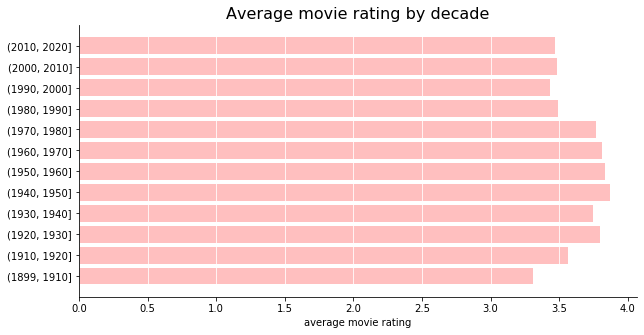

In [85]:
fig, ax = plt.subplots(figsize=(10,5))

ax.barh(means.index.astype(str), means, color = 'red', alpha = 0.25 )

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_title('Average movie rating by decade', fontsize=16)
ax.set_xlabel('average movie rating')


ax.grid(axis = 'x', color='white')

plt.show()